<a href="https://colab.research.google.com/github/rushimhaisane8830/DS/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

In [10]:
x , y =make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [11]:
df = pd.DataFrame(x , columns=['col1', 'col2', 'col3', 'col4', 'col5'])

In [12]:
df

,col1,col2,col3,col4,col5
0,3.093850,-2.578678,2.187231,0.126036,0.235334
1,2.064120,-1.466959,2.460038,-0.172985,-1.086003
2,-0.054402,-0.698927,1.564865,0.948686,-2.107481
3,-0.964075,-1.168592,-0.019702,-0.154455,-0.784254
4,-0.893331,2.713507,0.741659,0.011865,-1.180046
...,...,...,...,...,...
95,1.754597,0.332689,-2.694196,0.761223,-2.469392
96,-1.182671,2.670528,-0.506947,1.161235,-0.763832
97,0.839283,0.023939,1.690957,-1.144013,-0.287366
98,0.352190,0.429498,-2.235295,0.176981,-2.524333


In [13]:

df['target'] = y

In [14]:
y

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [36]:
df.tail()

,col1,col2,col3,col4,col5,target
95,1.754597,0.332689,-2.694196,0.761223,-2.469392,0
96,-1.182671,2.670528,-0.506947,1.161235,-0.763832,0
97,0.839283,0.023939,1.690957,-1.144013,-0.287366,1
98,0.352190,0.429498,-2.235295,0.176981,-2.524333,0
99,-0.320042,1.282028,0.438092,-2.118859,-3.380987,0


In [17]:
df.shape

(100, 6)

In [18]:
def sample_rows(df, percent):
  return df.sample(int(percent*df.shape[0]), replace=True)

In [19]:
def sample_features(df, percent):
  cols = random.sample(df, columns.tolist()[:,-1], int(percent*df.shape[1]))

  return df[cols]

In [20]:
def combined_sampling(df, row_percent, col_percent):
  new_df = sample_rows(df, row_percent)
  return sample_features(new_df, col_percent)

In [21]:
df1 = sample_rows(df, 0.1)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

In [22]:
df1.shape

(10, 6)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [25]:
clf1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

In [26]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.593\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'x[3] <= -1.579\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.6666666666666667, '  False')]

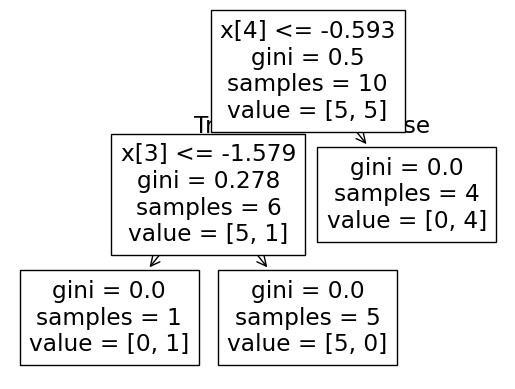

In [27]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= -0.21\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.625, 0.5, '  False')]

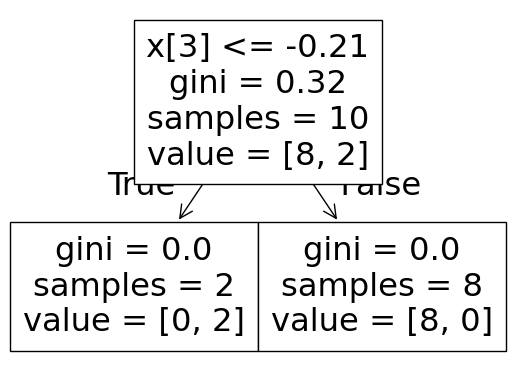

In [28]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.177\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'x[4] <= -2.418\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

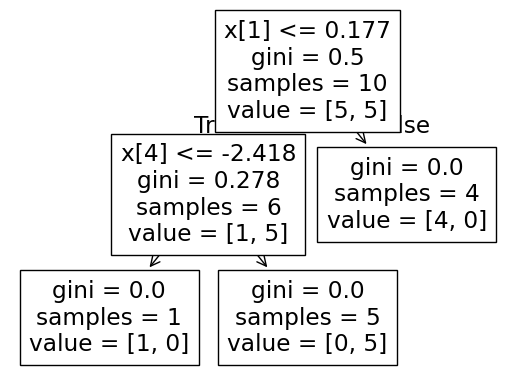

In [29]:
plot_tree(clf3)

In [37]:
clf1.predict(np.array([0.839283, 0.023939,	1.690957,	-1.144013,	-0.287366	]).reshape(1,5))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [38]:
clf2.predict(np.array([0.839283, 0.023939,	1.690957,	-1.144013,	-0.287366	]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [39]:
clf3.predict(np.array([-0.839283, 0.023939,	1.690957,	-1.144013,	-0.287366	]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])